In [1]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./data/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./data/horse-or-human/humans')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse48-2.png', 'horse07-7.png', 'horse42-9.png', 'horse06-8.png', 'horse24-2.png', 'horse14-7.png', 'horse27-0.png', 'horse45-9.png', 'horse31-8.png', 'horse48-5.png']
['human06-08.png', 'human12-25.png', 'human15-19.png', 'human07-24.png', 'human16-30.png', 'human02-27.png', 'human02-01.png', 'human09-11.png', 'human12-08.png', 'human16-14.png']


In [3]:
print('total training horse images:',len(os.listdir(train_horse_dir)))
print('total training human images:',len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph, we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index=0

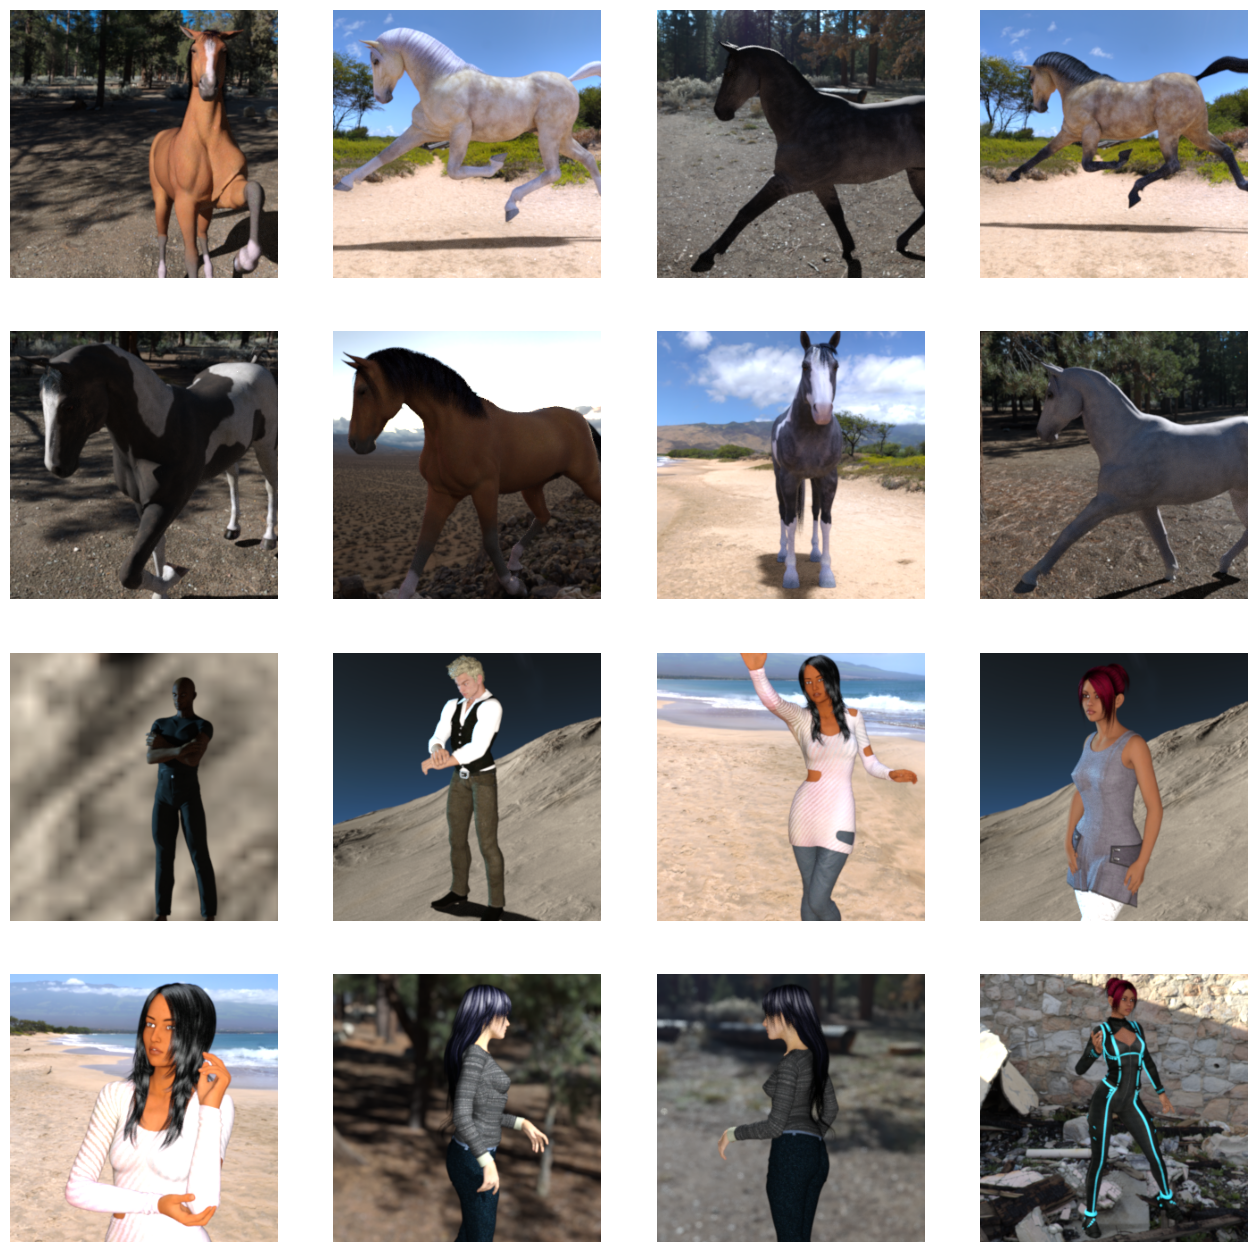

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index +=8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1,activation='sigmoid')
])

2024-01-20 23:23:43.146129: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-20 23:23:43.146277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-20 23:23:43.165541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-20 23:23:43.165668: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-20 23:23:43.165763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

*Note:* In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory('./data/horse-or-human', # This is the source directory for training images
                                                    target_size=(300,300), # All images will be resized to 300x300
                                                    batch_size=128,
                                                    # Since we use binary_crossentropy loss, we need binary labels
                                                    class_mode='binary')

Found 1027 images belonging to 2 classes.


In [12]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1)

Epoch 1/15


2024-01-20 23:23:45.594200: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2024-01-20 23:23:47.957234: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8/8 [==============================] - 8s 398ms/step - loss: 0.8862 - accuracy: 0.5156
Epoch 2/15
8/8 [==============================] - 3s 410ms/step - loss: 0.7376 - accuracy: 0.6607
Epoch 3/15
8/8 [==============================] - 3s 454ms/step - loss: 0.8962 - accuracy: 0.8509
Epoch 4/15
8/8 [==============================] - 3s 391ms/step - loss: 0.6736 - accuracy: 0.7731
Epoch 5/15
8/8 [==============================] - 3s 454ms/step - loss: 0.3005 - accuracy: 0.8788
Epoch 6/15
8/8 [==============================] - 3s 392ms/step - loss: 0.6460 - accuracy: 0.8287
Epoch 7/15
8/8 [==============================] - 3s 454ms/step - loss: 0.2016 - accuracy: 0.9199
Epoch 8/15
8/8 [==============================] - 3s 391ms/step - loss: 0.4406 - accuracy: 0.8743
Epoch 9/15
8/8 [==============================] - 3s 410ms/step - loss: 0.1685 - accuracy: 0.9377
Epoch 10/15
8/8 [==============================] - 3s 401ms/step - loss: 0.4932 - accuracy: 0.8888
Epoch 11/15
8/8 [=============

In [19]:
import cv2
import numpy as np

./data/horse-or-human/horses/horse03-0.png is a horse


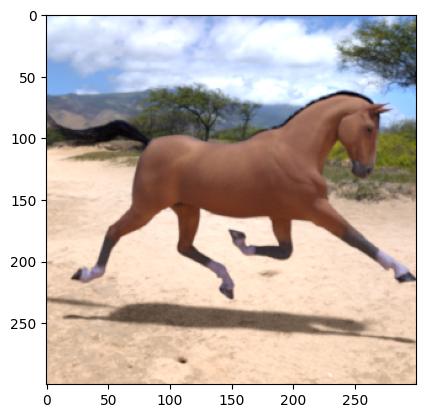

In [25]:
path = './data/horse-or-human/horses/horse03-0.png'
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (300,300), interpolation = cv2.INTER_LINEAR)
x = img/255
x = np.expand_dims(x,axis=0)

pred = model.predict(x, batch_size=10)

if pred > 0.5:
    print(path + " is a human")
else:
    print(path + " is a horse")

plt.imshow(img)

/tmp/ipykernel_39466/846085612.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipykernel_39466/846085612.py:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


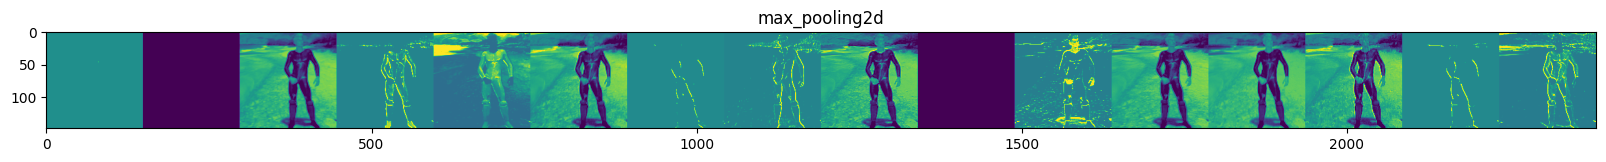

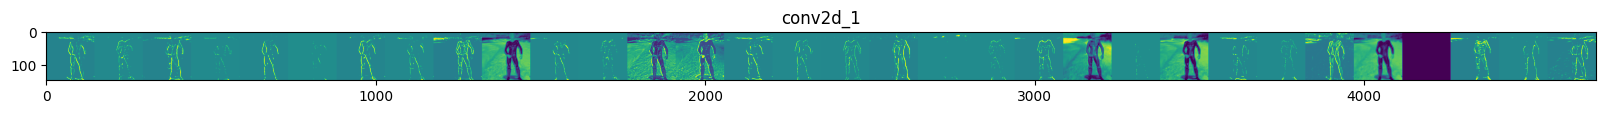

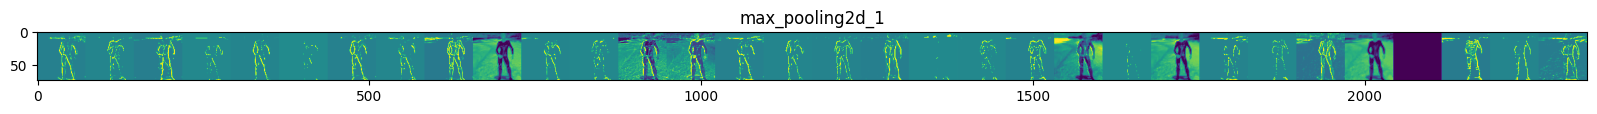

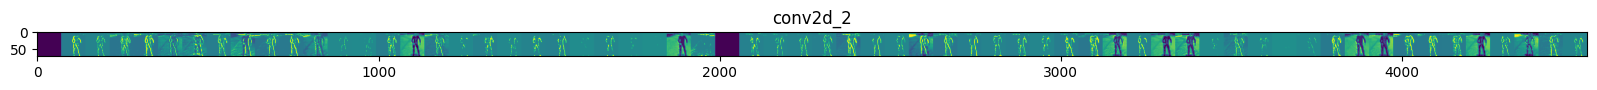

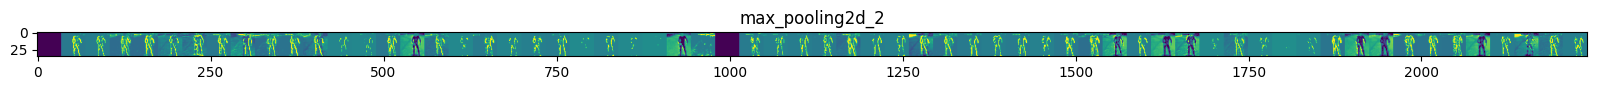

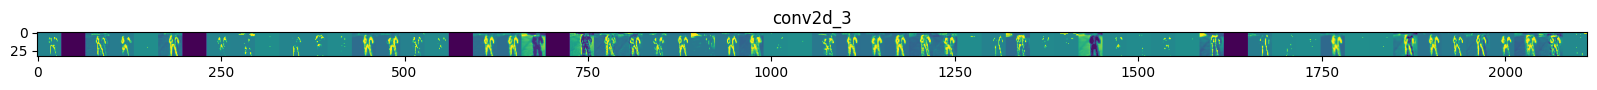

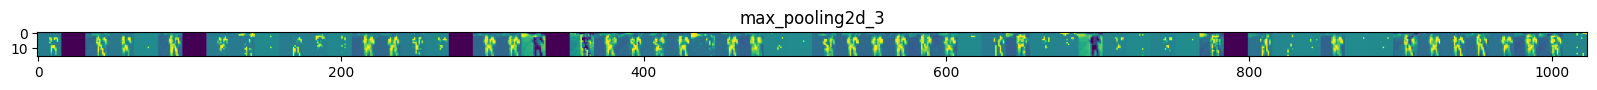

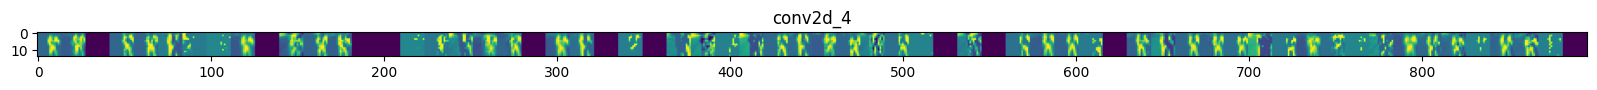

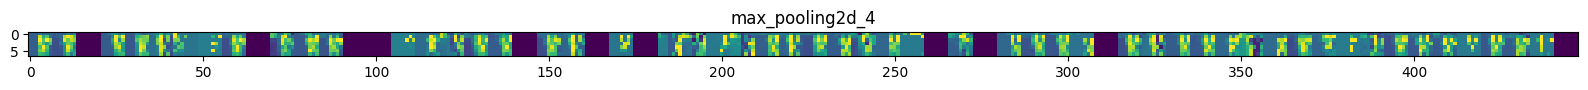

In [29]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# references

[Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture)

[RMSprop optimization algorithm](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp)

[stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD)

[Adam](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam)

[Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad)